[FUNCTION]:Easy Novel Analysis...
[Author]:Charles


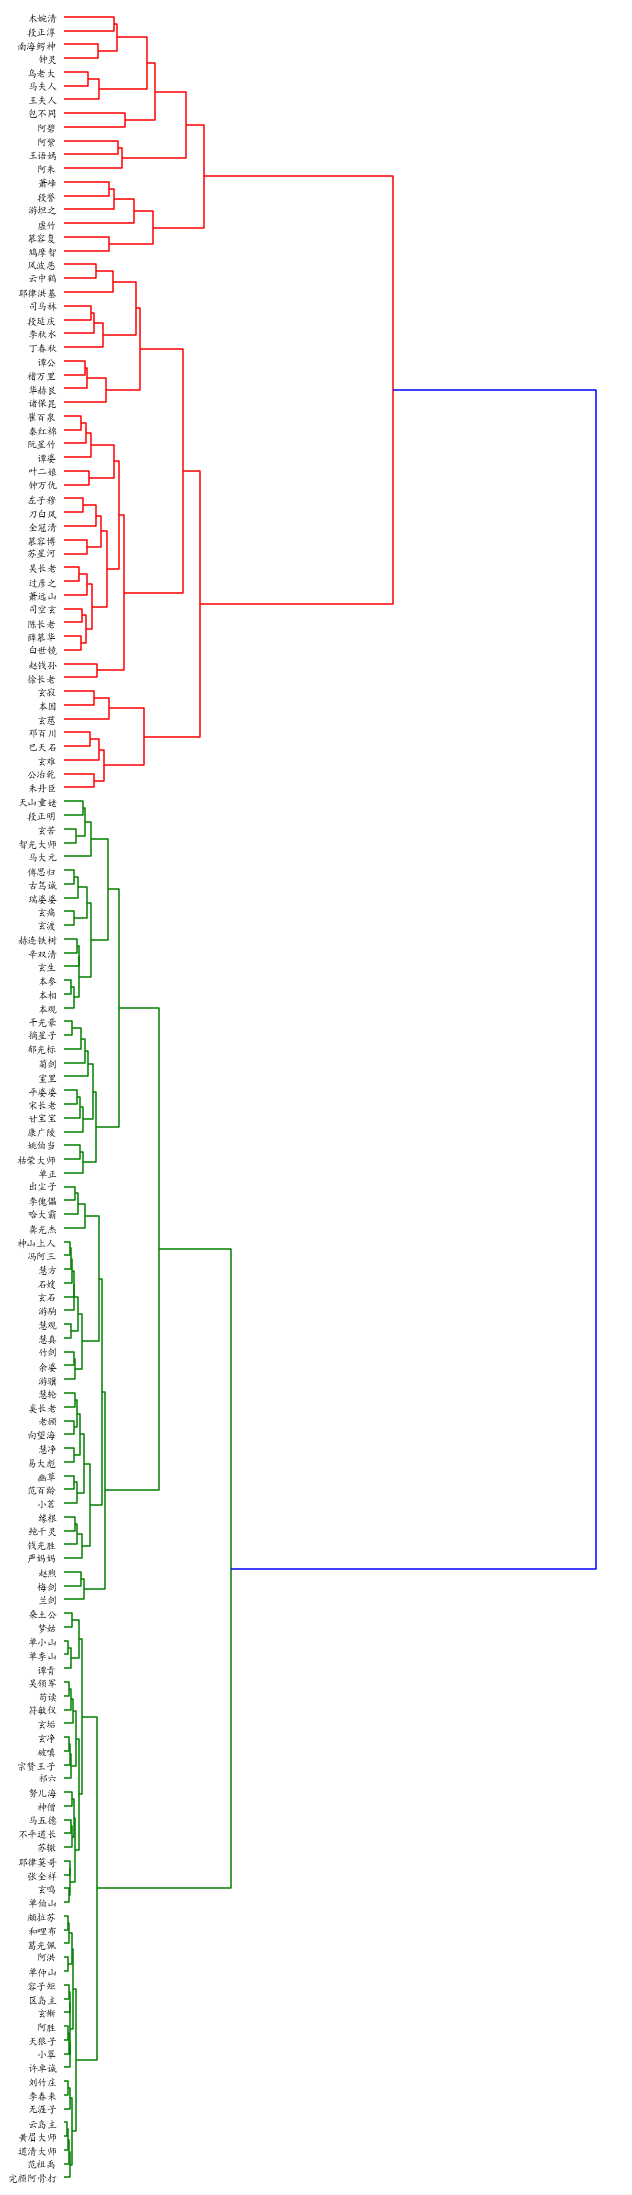

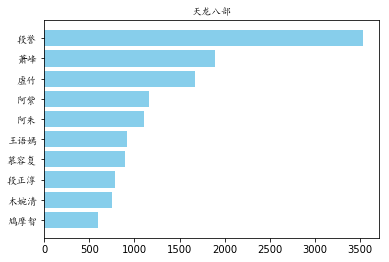

d:\Anaconda3\lib\site-packages\ipykernel\__main__.py:36: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
d:\Anaconda3\lib\site-packages\ipykernel\__main__.py:62: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
d:\Anaconda3\lib\site-packages\ipykernel\__main__.py:66: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
d:\Anaconda3\lib\site-packages\ipykernel\__main__.py:68: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


阿朱和萧峰的关系类似于阿紫和游坦之的关系


In [ ]:
import gensim
import jieba
import scipy
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as hierarchy
from matplotlib.font_manager import FontProperties
from snownlp import SnowNLP


class easy_analysis():
	def __init__(self):
		print('[FUNCTION]:Easy Novel Analysis...')
		print('[Author]:Charles')
	# 词向量训练
	def training(self, text):
		with open(text, encoding='utf-8') as f:
			data = [line.strip() for line in f.readlines() if line.strip()]
		sentences = []
		for d in data:
			words = list(jieba.cut(d))
			sentences.append(words)
		model = gensim.models.Word2Vec(sentences, size=100, window=5, min_count=5, workers=4)
		return model
	# 给jieba添加关键词
	def add_key_words(self, words):
		for word in words:
			jieba.add_word(word)
	# 获得需要添加的关键词
	def get_key_words(self, text):
		with open(text, encoding='utf-8') as f:
			words = [line.strip('\n') for line in f.readlines()]
		return words
	# 返回d，a与b的关系和c与d的关系一样
	def get_relation(self, model, a, b, c):
		d, _ = model.most_similar(positive=[c, b], negative=[a])[0]
		print('{}和{}的关系类似于{}和{}的关系'.format(a, b, c, d))
	# 找主要人物
	def find_main_characters(self, text1, text2, num=10, title='Untitled'):
		with open(text1, encoding='utf-8') as f:
			text = f.read()
		with open(text2, encoding='utf-8') as f:
			character_names = [line.strip('\n') for line in f.readlines()]
		count = []
		for name in character_names:
			count.append([name, text.count(name)])
		count.sort(key=lambda x: x[1])
		_, ax = plt.subplots()
		frequency = [x[1] for x in count[-num:]]
		names = [x[0] for x in count[-num:]]
		ax.barh(range(num), frequency, color='skyblue', align='center')
		font = FontProperties(fname="./fonts/simkai.ttf")
		ax.set_title(title, fontproperties=font)
		ax.set_yticks(range(num))
		ax.set_yticklabels(names, fontproperties=font)
		plt.show()
	# 层级聚类
	def hierarchy_(self, model, character_names):
		exist_names = []
		word_vectors = None
		for name in character_names:
			if name in model:
				exist_names.append(name)
		for name in exist_names:
			if word_vectors is None:
				word_vectors = model[name]
			else:
				word_vectors = np.vstack((word_vectors, model[name]))
		np_names = np.array(exist_names)
		font = FontProperties(fname="./fonts/simkai.ttf")
		Y = hierarchy.linkage(word_vectors, method='ward')
		_, ax = plt.subplots(figsize=(10, 40))
		Z = hierarchy.dendrogram(Y, orientation='right')
		index = Z['leaves']
		ax.set_xticks([])
		ax.set_yticklabels(np_names[index], fontproperties=font, fontsize=14)
		ax.set_frame_on(False)
		plt.savefig('results.jpg')
		# plt.show()
	# 简单的情感分析
	def Get_Emotion(self, text):
		contents = open(text, 'r', encoding='utf-8').readlines()
		marks_list = []
		for content in contents:
			content = content.strip()
			if not content:
				continue
			mark = SnowNLP(content)
			marks_list.append(mark.sentiments)
		plt.hist(marks_list, bins=np.arange(0, 1, 0.02))
		plt.show()



if __name__ == '__main__':
	ea = easy_analysis()
	ea.find_main_characters(text1='tianlong.txt', text2='./tl_names.txt', title='天龙八部')
	ea.add_key_words(ea.get_key_words('./tl_names.txt'))
	model = ea.training('./tianlong.txt')
	model.save('model')
# 	model = gensim.models.Word2Vec.load('./model')
	ea.get_relation(model, '阿朱', '萧峰', '阿紫')
	ea.hierarchy_(model, ea.get_key_words('./tl_names.txt'))
	ea.Get_Emotion('./tianlong.txt')